In [1]:
from google.colab import drive
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import os

In [3]:
drive.mount("/content/drive")
file_path = ('/content/drive/MyDrive/Colab Notebooks/MLE_human_scream/')
file_path2 = ('/content/drive/MyDrive/Colab Notebooks/MLE_nonscream/')
file = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving Baby+Laugh+1.wav to Baby+Laugh+1.wav
Saving Sneeze+2.wav to Sneeze+2.wav
Saving Sneeze+1.wav to Sneeze+1.wav
Saving Yawn+6.wav to Yawn+6.wav
Saving Hiccup+Hicough+3.wav to Hiccup+Hicough+3.wav
Saving Giggle+8.wav to Giggle+8.wav
Saving Giggle+9.wav to Giggle+9.wav
Saving Gasp+2.wav to Gasp+2.wav
Saving Gasp+3.wav to Gasp+3.wav
Saving Explosion+2.wav to Explosion+2.wav
Saving carhorn.wav to carhorn.wav
Saving car+running3.wav to car+running3.wav
Saving car+horn+x.wav to car+horn+x.wav
Saving Car+Alarm.wav to Car+Alarm.wav
Saving BMW+DRIVEBY.wav to BMW+DRIVEBY.wav
Saving bus_door.wav to bus_door.wav
Saving Wdog_drinking.wav to Wdog_drinking.wav
Saving water_running_loop.wav to water_running_loop.wav
Saving city_traffic.wav to city_traffic.wav
Saving CAR-DOOR.wav to CAR-DOOR.wav
Saving AMBsiren.wav to AMBsiren.wav
Saving Laugh+Female.wav to Laugh+Female.wav
Saving Laugh+5.wav to Laugh+5.wav
Saving Laugh+6.wav to Laugh+6.wav
Saving Laugh+4.wav to Laugh+4.wav
Saving forest_fire.wav t

In [4]:
feature_vector = pd.DataFrame()
target = []

for file in os.listdir(file_path):
  print("Analyzing file ", str(file))

  y,sr = librosa.load(file, sr=None)
  y = librosa.effects.time_stretch(y, rate=0.5)
  chunkstep = int(y.size/20)

  for i in range(1,20):
      chunk = y[(i-1)*chunkstep:i*chunkstep]
      if np.sum(np.abs(chunk)) > 1e-4:
        mfccs = librosa.feature.mfcc(y=chunk, sr=sr, n_mfcc=13)
        spectral_contrast = librosa.feature.spectral_contrast(y=chunk, sr=sr)
        rms = librosa.feature.rms(y=chunk)
        chroma = librosa.feature.chroma_stft(y=chunk,sr=sr)

        mfccs_mean = pd.Series(np.mean(mfccs.T, axis=0))
        sc_mean = pd.Series(np.mean(chroma.T, axis=0))
        rms_mean = pd.Series(np.mean(spectral_contrast.T, axis=0))
        chroma_mean = pd.Series(np.mean(rms.T, axis=0))

        target = pd.Series(np.array(['Scream']))

        binary = pd.Series(np.array([0]))

        features = pd.concat([mfccs_mean, sc_mean, rms_mean, chroma_mean, target, binary], axis=0)

        feature_vector = feature_vector._append(features, ignore_index =True)

for file in os.listdir(file_path2):
  print("Analyzing file ", str(file))

  y,sr = librosa.load(file, sr=None)
  y = librosa.effects.time_stretch(y, rate=0.5)
  chunkstep = int(y.size/20)

  for i in range(1,20):
      chunk = y[(i-1)*chunkstep:i*chunkstep]
      if np.sum(np.abs(chunk)) > 1e-4:
        mfccs = librosa.feature.mfcc(y=chunk, sr=sr, n_mfcc=13)
        spectral_contrast = librosa.feature.spectral_contrast(y=chunk, sr=sr)
        rms = librosa.feature.rms(y=chunk)
        chroma = librosa.feature.chroma_stft(y=chunk,sr=sr)

        mfccs_mean = pd.Series(np.mean(mfccs.T, axis=0))
        sc_mean = pd.Series(np.mean(chroma.T, axis=0))
        rms_mean = pd.Series(np.mean(spectral_contrast.T, axis=0))
        chroma_mean = pd.Series(np.mean(rms.T, axis=0))

        target = pd.Series(np.array(['NonScream']))

        binary = pd.Series(np.array([1]))

        features = pd.concat([mfccs_mean, sc_mean, rms_mean, chroma_mean, target, binary], axis=0)

        feature_vector = feature_vector._append(features, ignore_index =True)


feature_vector.columns = ["mfcss1","mfcss2","mfcss3","mfcss4","mfcss5","mfcss6","mfcss7","mfcss8","mfcss9","mfcss10","mfcss11","mfcss12","mfcss13",
                          "sc1","sc2","sc3","sc4","sc5","sc6","sc7","sc8","sc9","sc10","sc11","sc12",
                          "rms1","rms2","rms3","rms4","rms5","rms6","rms7",
                          "chroma",
                          "target",
                          "binary"]

print(sr)

Analyzing file  Scream+11.mp3
Analyzing file  Scream+21.mp3
Analyzing file  Scream+Female+2.mp3
Analyzing file  Scream+19.mp3


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  Scream+Male.mp3
Analyzing file  Scream+Female+1.mp3
Analyzing file  Scream+17.mp3
Analyzing file  Scream+15.mp3
Analyzing file  Scream+13.mp3
Analyzing file  Scream+28.mp3
Analyzing file  Scream+8.mp3
Analyzing file  Scream+3.mp3
Analyzing file  Scream+1.mp3
Analyzing file  Scream+26.mp3
Analyzing file  Screams+2.mp3
Analyzing file  Scream+25.mp3
Analyzing file  Scream+Female+4.mp3
Analyzing file  Scream+Female+3.mp3
Analyzing file  Scream+29.mp3
Analyzing file  Scream+27.mp3
Analyzing file  Scream+23.mp3
Analyzing file  Scream+14.mp3
Analyzing file  Scream+5.mp3
Analyzing file  Yell+2.mp3
Analyzing file  Yell+1.mp3
Analyzing file  Yell+3.mp3
Analyzing file  yellgroan.mp3
Analyzing file  Burp+Scream.wav
Analyzing file  Scream+Female+2.wav
Analyzing file  SCREAM3.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  screamandchoke.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  Scream+25.wav
Analyzing file  Screams+2.wav
Analyzing file  Scream+26.wav
Analyzing file  Scream+Female+3.wav
Analyzing file  Scream+29.wav
Analyzing file  Scream+2.wav
Analyzing file  Scream+Male+2.wav
Analyzing file  Scream+23.wav
Analyzing file  Scream+5.wav
Analyzing file  Scream+20.wav
Analyzing file  yellgroan2.wav
Analyzing file  yell4.wav
Analyzing file  yellgroan.wav
Analyzing file  yellau.wav
Analyzing file  Scream+16.wav
Analyzing file  Scream+18.wav
Analyzing file  Scream+14.wav
Analyzing file  Scream+13.wav
Analyzing file  Scream+12.wav
Analyzing file  Scream+10.wav
Analyzing file  Scream+9.wav
Analyzing file  Scream+6.wav
Analyzing file  Scream+Female+4.wav
Analyzing file  Yell+1.wav
Analyzing file  Yell+3.wav
Analyzing file  Yell+2.wav
Analyzing file  Scream+1.wav
Analyzing file  Scream+3.wav
Analyzing file  Scream+8.wav
Analyzing file  Scream+28.wav
Analyzing file  Scream+15.wav
Analyzing file  Scream+17.wav
Analyzing file  Scream+Female+1.wav
Analyzing 

/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  Scream+21.wav
Analyzing file  Scream+11 (1).wav
Analyzing file  Phone_Ring.wav
Analyzing file  Trash_Can.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  can_drop.wav
Analyzing file  crushsodacan.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  gateclosing.wav
Analyzing file  gunfight2.wav
Analyzing file  footstepsmarching.wav
Analyzing file  Fire1.wav
Analyzing file  fire2.wav
Analyzing file  forest_fire.wav
Analyzing file  Laugh+4.wav
Analyzing file  Laugh+6.wav
Analyzing file  Laugh+5.wav
Analyzing file  Laugh+Female.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  AMBsiren.wav
Analyzing file  water_running_loop.wav
Analyzing file  Wdog_drinking.wav
Analyzing file  bus_door.wav
Analyzing file  BMW+DRIVEBY.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  Car+Alarm.wav
Analyzing file  car+horn+x.wav
Analyzing file  car+running3.wav
Analyzing file  carhorn.wav
Analyzing file  Explosion+2.wav
Analyzing file  Gasp+3.wav
Analyzing file  Gasp+2.wav
Analyzing file  Giggle+9.wav
Analyzing file  Hiccup+Hicough+3.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1524
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1524
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1524
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1524
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1524
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1524
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

Analyzing file  Yawn+6.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  Sneeze+1.wav
Analyzing file  Sneeze+2.wav
Analyzing file  Baby+Laugh+1.wav
Analyzing file  city_traffic.wav
Analyzing file  Giggle+8.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(


Analyzing file  CAR-DOOR.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1188
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/librosa/core/spectrum.py

Analyzing file  BOB-CAT.wav
Analyzing file  catfight.wav
Analyzing file  bark3.wav
Analyzing file  catgrowl.wav
Analyzing file  grizzbear.wav
Analyzing file  dog2.wav
Analyzing file  bark.wav
Analyzing file  Crackling_Fire.wav
Analyzing file  hammer.wav
Analyzing file  FireCrac3.wav


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Analyzing file  fireccarc2.wav
Analyzing file  Police.wav
Analyzing file  wtrblop.wav
Analyzing file  constrc1.wav
Analyzing file  construction.wav
Analyzing file  Snore+2.wav
Analyzing file  Giggle+4.wav
Analyzing file  Cough+6.wav
44100


/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
/usr/local/lib/python3.11/dist-packages/librosa/core/pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [5]:
feature_vector

,mfcss1,mfcss2,mfcss3,mfcss4,mfcss5,mfcss6,mfcss7,mfcss8,mfcss9,mfcss10,...,rms1,rms2,rms3,rms4,rms5,rms6,rms7,chroma,target,binary
0,-255.343811,260.162262,-76.675171,-13.116445,45.984482,-16.839119,-14.525303,22.404284,-18.347160,-16.866570,...,12.204546,8.975175,10.838395,11.644138,17.753609,36.207732,17.713810,0.069006,Scream,0
1,-321.984161,283.824249,-97.029350,-25.052307,53.657074,-26.145805,-16.322891,21.710474,-22.773245,-18.723188,...,11.803338,10.427984,12.370644,13.577211,19.909694,42.963130,20.384224,0.047893,Scream,0
2,-254.761108,202.935074,-54.180691,-31.169924,18.916922,-27.181007,-19.405167,7.970655,-20.929811,-18.771082,...,14.664722,7.590220,16.236864,14.386249,18.845195,42.841720,19.918178,0.120503,Scream,0
3,-168.603104,234.038376,-75.416832,-65.348953,4.287228,-23.386393,-15.408414,16.879379,-2.776377,-4.517650,...,8.273194,8.770116,14.067229,19.917712,20.625890,40.839151,15.212580,0.306013,Scream,0
4,-161.633072,249.544235,-81.999763,-64.560219,15.684459,-11.957820,-2.353091,27.045698,-4.808363,-16.300713,...,8.372450,9.107389,11.326232,14.920869,18.269540,41.675344,15.193530,0.281464,Scream,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,-165.516602,240.713562,-51.841293,-19.019876,37.595261,4.785349,1.663368,18.456276,0.586884,-5.051072,...,9.605446,11.522555,14.083804,17.939638,16.644043,22.155861,10.251824,0.217293,NonScream,1
2289,-145.887482,227.991425,-41.084801,-12.375619,25.684393,1.387080,-0.519632,20.477741,6.163813,-9.960081,...,9.600156,10.428337,13.154090,16.220541,17.412671,21.607772,10.033570,0.249252,NonScream,1
2290,-189.888000,243.859131,-31.848999,-6.417582,35.669147,0.611989,5.488122,24.860659,0.981523,-6.713048,...,13.589621,9.901991,14.190595,15.422556,14.734957,25.151894,9.643245,0.186064,NonScream,1
2291,-278.926270,237.392410,-14.553343,13.166822,42.845280,0.754174,14.774240,34.864277,9.144863,3.742972,...,7.761499,8.983502,13.663071,15.671521,15.074769,29.695780,10.196455,0.115035,NonScream,1


In [21]:
statsanalysis = pd.DataFrame()

for feature in feature_vector.iloc[:,:-2]:

  mean = pd.Series(feature_vector.loc[:,feature].mean())
  #print(str(feature), "mean: ", str(mean))
  median = pd.Series(feature_vector.loc[:,feature].median())
  #print(str(feature), "median: ", str(median))
  sd = pd.Series(feature_vector.loc[:,feature].std())
  #print(str(feature), "standard deviation: ", str(sd))
  max = pd.Series(feature_vector.loc[:,feature].max())
  #print(str(feature), "max: ", str(max))
  min = pd.Series(feature_vector.loc[:,feature].min())
  #print(str(feature), "min: ", str(min))

  stats = pd.concat([mean, median, sd, max, min])
  statsanalysis = statsanalysis._append(stats, ignore_index =True)

statsanalysis.columns = ["mean", "median", "standard deviation", "maximum", "minimum"]
statsanalysis.index = ["mfcss1","mfcss2","mfcss3","mfcss4","mfcss5","mfcss6","mfcss7","mfcss8","mfcss9","mfcss10","mfcss11","mfcss12","mfcss13",
                          "sc1","sc2","sc3","sc4","sc5","sc6","sc7","sc8","sc9","sc10","sc11","sc12",
                          "rms1","rms2","rms3","rms4","rms5","rms6","rms7",
                          "chroma"]
statsanalysis

,mean,median,standard deviation,maximum,minimum
mfcss1,-251.905222,-233.462662,107.623268,28.347210,-893.066467
mfcss2,211.457431,220.049042,43.255116,317.399048,48.090130
mfcss3,-82.184653,-82.584023,39.362280,29.688459,-196.585800
mfcss4,-23.119241,-26.543940,41.401333,101.921799,-108.121475
mfcss5,19.648181,23.197685,30.816451,91.743729,-72.556366
mfcss6,-9.705087,-8.977072,22.988576,48.659611,-74.403084
mfcss7,-7.230034,-6.179379,19.992570,51.597950,-59.491196
mfcss8,13.887436,16.879379,17.507120,60.246849,-50.804562
mfcss9,0.582223,0.051677,18.673181,45.447849,-53.791977
mfcss10,-8.368298,-8.323777,12.505918,28.422417,-68.518440


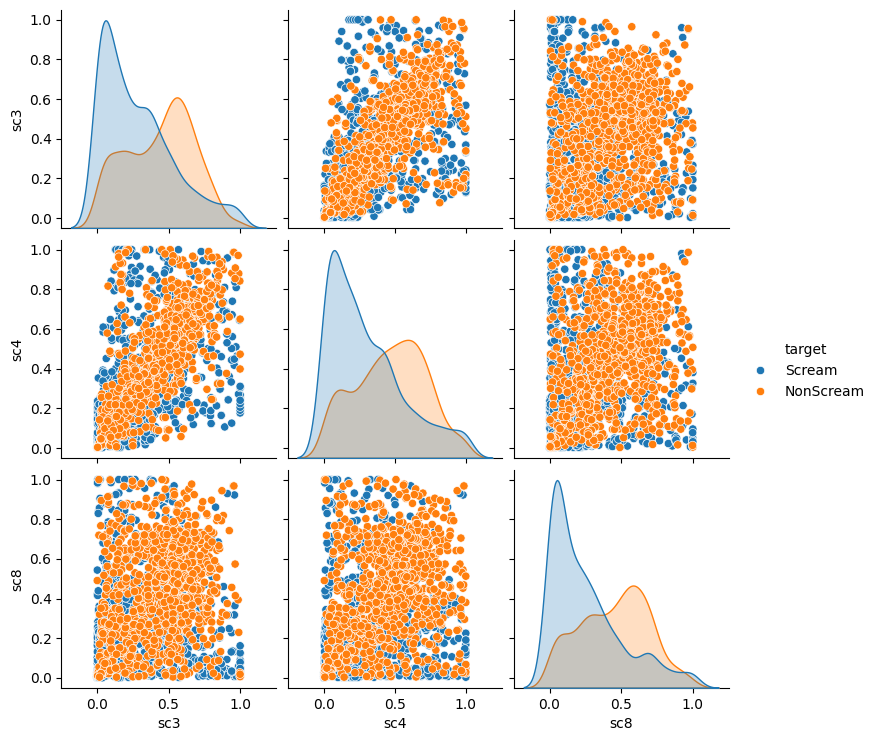

In [17]:
#Make pairplots of training data
sns.pairplot(feature_vector.iloc[:,[15,16,20,-2]], hue = "target")
#plt.title("Pairplots of Distinct Feature Patterns", loc='left')
plt.show()

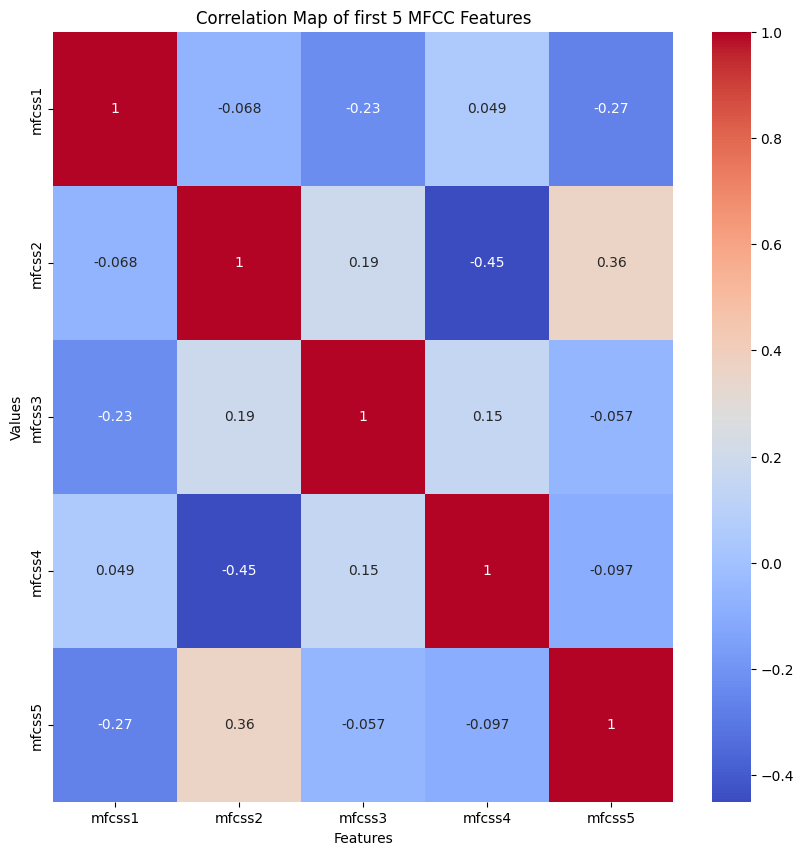

In [19]:
plt.figure(figsize=(10,10))
cor = feature_vector.iloc[:,0:5].corr("spearman")
sns.heatmap(cor, annot=True, cmap="coolwarm")
plt.title("Correlation Map of first 5 MFCC Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()
